<a href="https://colab.research.google.com/github/sidh26/ANN/blob/main/classwork/ANN%2027th%20Mar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

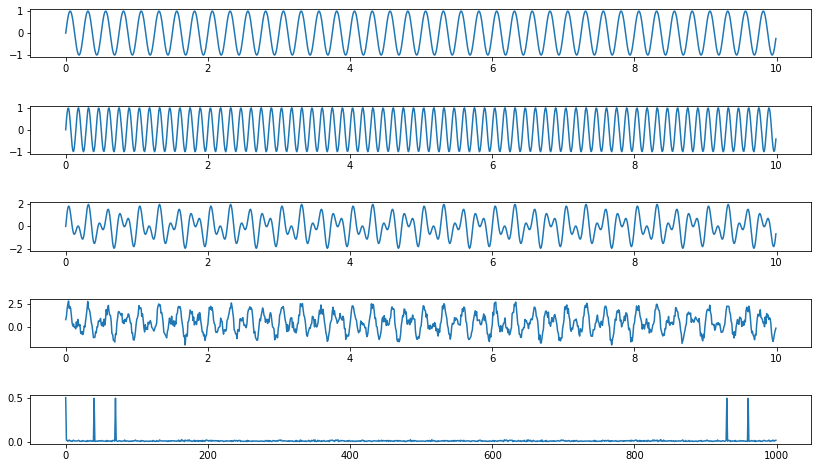

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sf = 100
si = 1/sf
begint = 0
endt = 10

f1 = 4
f2 = 7

time = np.arange(begint, endt, si)

s1 = np.sin(2*np.pi*f1*time) # trend(ish)
s2 = np.sin(2*np.pi*f2*time) # seasonality(ish)
n = np.random.random(size=(1000, )) # noise
s = s1 + s2
s_n = s + n

fft_signal = np.fft.fft(s_n)/len(s_n)
fft_signal = fft_signal[range(int(len(s_n)/2))]

fig, axis = plt.subplots(figsize=(14, 8), nrows=5, ncols=1)
plt.subplots_adjust(hspace=1)

axis[0].plot(time, s1)
axis[1].plot(time, s2)
axis[2].plot(time, s)
axis[3].plot(time, s_n)
axis[4].plot(np.abs(fft_signal))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


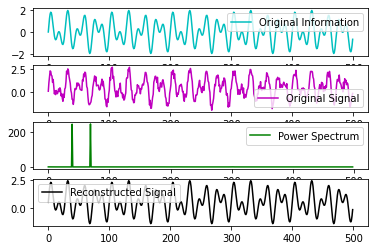

In [ ]:
# Calculate FFT
fft = np.fft.fft(s_n, len(s_n))

# Calculate the power spectrum/amplitude
PSD = fft*np.conj(fft)/len(s_n)

# take only first half of freq
L = np.arange(1, np.floor(len(s_n)/2), dtype='int')

# Use PSD to filter noise
indices = PSD > 100

# use only PSD, fft where filter>threshold
PSDclean = indices*PSD
fftclean = indices*fft

# take inverse fft
inv_fft = np.fft.ifft(fftclean)

fig, axes = plt.subplots(4, 1)

plt.sca(axes[0])
plt.plot(s[-500:], color='c', LineWidth=1.5, label='Original Information')
plt.legend()

plt.sca(axes[1])
plt.plot(s_n[-500:], color='m', LineWidth=1.5, label='Original Signal')
plt.legend()

plt.sca(axes[2])
plt.plot(PSD[L], color='g', LineWidth=1.5, label='Power Spectrum')
plt.legend()

plt.sca(axes[3])
plt.plot(inv_fft[-500:], color='k', LineWidth=1.5, label='Reconstructed Signal')
plt.legend()

# PSD on actual dataset


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('/content/monthly-sunspots.csv')

In [52]:
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [54]:
data = df['Sunspots']
length = len(data)
half_len = int(length/2)

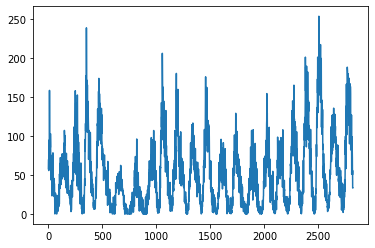

In [56]:
plt.plot(data.values)

In [55]:
# Calculate FFT
fft = np.fft.fft(data, length)

# Calculate the power spectrum/amplitude
PSD = fft*np.conj(fft)/length

# take only first half of freq
L = np.arange(1, np.floor(half_len), dtype='int')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


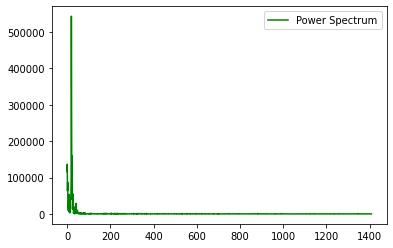

In [57]:
plt.plot(PSD[L], color='g', LineWidth=1.5, label='Power Spectrum')
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


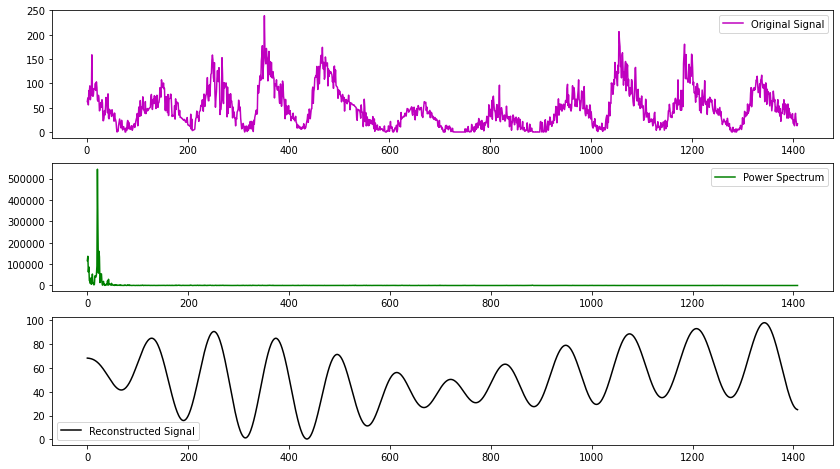

In [58]:
# Use PSD to filter noise
indices = PSD >= -np.sort(-PSD)[9]

# use only PSD, fft where filter>threshold
PSDclean = indices*PSD
fftclean = indices*fft

# take inverse fft
inv_fft = np.fft.ifft(fftclean)

fig, axes = plt.subplots(figsize=(14, 8), nrows=3, ncols=1)


plt.sca(axes[0])
plt.plot(data[L], color='m', LineWidth=1.5, label='Original Signal')
plt.legend()

plt.sca(axes[1])
plt.plot(PSD[L], color='g', LineWidth=1.5, label='Power Spectrum')
plt.legend()

plt.sca(axes[2])
plt.plot(inv_fft[L], color='k', LineWidth=1.5, label='Reconstructed Signal')
plt.legend()